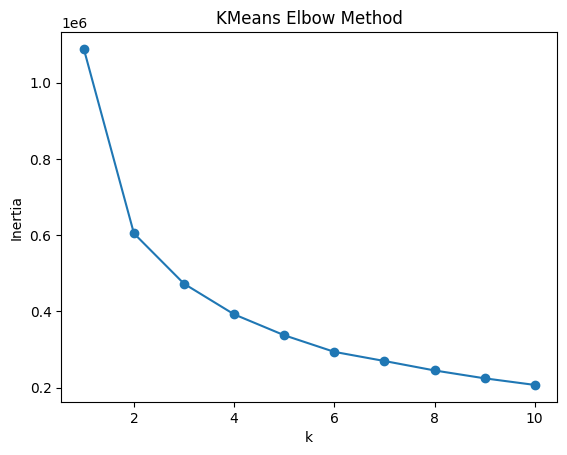

KMeans ARI: 0.020593537591174726
KMeans Silhouette: 0.38891796219674873


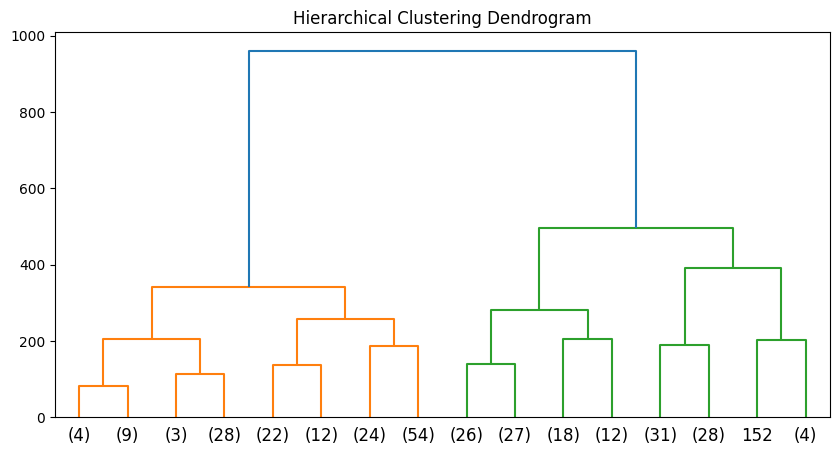

Hierarchical ARI: 0.01690345977075803
Hierarchical Silhouette: 0.35091628775584294


In [1]:
# %% [markdown]
# 05_unsupervised_learning.ipynb
# Perform clustering with KMeans and Hierarchical.

# %%
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score, silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from pathlib import Path

ROOT = Path("..").resolve()

DATA_DIR = ROOT / "data"
RESULTS_DIR = ROOT / "results"

CLEANED_CSV = DATA_DIR / "heart_disease_cleaned.csv"
df = pd.read_csv(CLEANED_CSV)
X = df.drop(columns=["target"])
y = df["target"]

inertias = []
ks = range(1,11)
for k in ks:
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    km.fit(X)
    inertias.append(km.inertia_)

plt.plot(ks, inertias, marker="o")
plt.title("KMeans Elbow Method")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.savefig(RESULTS_DIR / "kmeans_elbow.png")
plt.show()

km = KMeans(n_clusters=2, n_init=10, random_state=42)
labels_km = km.fit_predict(X)
print("KMeans ARI:", adjusted_rand_score(y, labels_km))
print("KMeans Silhouette:", silhouette_score(X, labels_km))

Z = linkage(X, method="ward")
plt.figure(figsize=(10,5))
dendrogram(Z, truncate_mode="level", p=3)
plt.title("Hierarchical Clustering Dendrogram")
plt.savefig(RESULTS_DIR / "hierarchical_dendrogram.png")
plt.show()

agg = AgglomerativeClustering(n_clusters=2)
labels_agg = agg.fit_predict(X)
print("Hierarchical ARI:", adjusted_rand_score(y, labels_agg))
print("Hierarchical Silhouette:", silhouette_score(X, labels_agg))
